In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## INITIAL DATA SETUP
## Seting up packages

In [164]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns


#linear algebra
import numpy as np

#data processing
import pandas as pd

#splitting data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#tuning
from sklearn.model_selection import RandomizedSearchCV

#model evaluation
from sklearn import metrics

# Getting the data in

In [165]:
#importing data
df = pd.read_csv("C:\\Users\\kaden\\Desktop\\StrokePredictionDataset\\healthcare-dataset-stroke-data.csv")

In [166]:
#we can remove the ID column in the csv or in the code below
df = df.drop('id', axis = 1)

In [167]:
#to make sure the ID colum was removed and ensure data is being read grab the first 5 rows.
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## First look at the data

In [168]:
#lets take a look at the data types in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [108]:
#looking at the stats breakdown
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## PREPROCESSING
#### Data Cleaning
###### (this process can be done in the csv or in the code below.  Be sure to document what you have done in your data dictionary and in the code)

In [109]:
#convert string
## Make sure this is documented in the data dictionary!

# gender
df['gender'] = df['gender'].map({
    'Male' :int(0),
    'Female' :int(1),
    'Other' :int(2),})

# ever_married
df['ever_married'] = df['ever_married'].map({
'Yes':int(1), 
'No':int(0)})

# work_type
df['work_type'] = df['work_type'].map({
'Private':int(3), 
'Self-employed':int(4),
'Govt_job':int(2), 
'children':int(1), 
'Never_worked':int(0)})

# Residence_type
df['Residence_type'] = df['Residence_type'].map({
'Urban':int(2), 
'Rural':int(1)})

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
'formerly smoked':int(1),
'never smoked':int(2), 
'smokes':int(3),
'Unknown':int(0)})

In [110]:
# confirm the changes made

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [111]:
# replace missing values a.k.a 'N/A' values in the BMI column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [112]:
# what did that do to a row with N/A in the BMI column? Check out row 1 and how it changed!
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,2,228.69,36.600000,1,1
1,1,61.0,0,0,1,4,1,202.21,28.893237,2,1
2,0,80.0,0,1,1,3,1,105.92,32.500000,2,1
3,1,49.0,0,0,1,3,2,171.23,34.400000,3,1
4,1,79.0,1,0,1,4,1,174.12,24.000000,2,1


In [113]:
# check for null values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [114]:
# check for duplicates
dup = df.duplicated()
dup.sum()

0

## Splitting up the data
#### Creating a trainning and test data set
##### for X we are dropping stroke but using all of there other columns
##### for y we are using just stroke

In [115]:
X = df.drop(['stroke'], axis = 1)
y = df.pop('stroke')

## Creating the training and test sets
#### Best practice is 70 to 80% for training and 20 to 30% test sizes
#### Random_state = 10 will always keep the train and test samples the same, if not it will change every time

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [120]:
## Scaling data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## MODELING (its model creating time!)
#### 1) Logistic Regression
#### 2) Linear Discriminant Analysis
#### 3) Naive Bayes
#### 4) Decision Tree
#### 5) Random Forest

## Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=2000)

# fit the model
LR_model.fit(X_train, y_train)

y_predict_LR = LR_model.predict(X_test)

# model score
predict_train_LR = LR_model.predict(X_train)
predict_test_LR = LR_model.predict(X_test)

# accuracy score
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test,y_test)

# f1-score
LR_f1_score = metrics.f1_score(y_test,predict_test_LR)
LR_recall = metrics.recall_score(y_test,predict_test_LR)

print('Accuracy on Train set',LR_train_score)
print('Accuracy on Test set',LR_test_score)
print('F1-score on Test set:',LR_f1_score)
print(metrics.classification_report(y_test, predict_test_LR))

Accuracy on Train set 0.9535923958624546
Accuracy on Test set 0.9458577951728636
F1-score on Test set: 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



C:\Users\kaden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear Discriminant Analysis

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis(solver='svd')

# fit the model
LDA.fit(X_train, y_train)

y_predict_LDA = LDA.predict(X_test)

# model score
predict_train_LDA = LDA.predict(X_train)
predict_test_LDA = LDA.predict(X_test)

# accuracy score
LDA_train_score = LDA.score(X_train,y_train)
LDA_test_score = LDA.score(X_test,y_test)

# f1-score
LDA_f1_score = metrics.f1_score(y_test,predict_test_LDA)
LDA_recall = metrics.recall_score(y_test, predict_test_LDA)

print('Accuracy on Train set',LDA_train_score)
print('Accuracy on Test set',LDA_test_score)
print('F1-score on Test set:',LDA_f1_score)
print(metrics.classification_report(y_test, predict_test_LDA))

Accuracy on Train set 0.9510763209393346
Accuracy on Test set 0.9399869536855838
F1-score on Test set: 0.08
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.24      0.05      0.08        83

    accuracy                           0.94      1533
   macro avg       0.59      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



## Naive Bayes

In [150]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

# fit the model
NB_model.fit(X_train, y_train)

y_predict_NB = NB_model.predict(X_test)

# model score
predict_train_NB = NB_model.predict(X_train)
predict_test_NB = NB_model.predict(X_test)

# accuracy score
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test,predict_test_NB)
NB_recall = metrics.recall_score(y_test, predict_test_NB)

print('Accuracy on Train set',NB_train_score)
print('Accuracy on Test set',NB_test_score)
print('F1-score on Test set:',NB_f1_score)
print(metrics.classification_report(y_test, predict_test_NB))

Accuracy on Train set 0.8702823595191501
Accuracy on Test set 0.8714938030006523
F1-score on Test set: 0.2676579925650558
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy                           0.87      1533
   macro avg       0.58      0.67      0.60      1533
weighted avg       0.92      0.87      0.89      1533



## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 0.9099804305283757
F1-score on Test set: 0.1038961038961039


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1450
           1       0.11      0.10      0.10        83

    accuracy                           0.91      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.90      0.91      0.91      1533



## Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

# create object model
RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 1.0
Accuracy on Test set 0.9445531637312459
F1-score on Test set: 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



## TUNING EACH MODEL

#### 1) Decision Tree
#### 2) Random Forest

## Tuning for Decision Tree

In [153]:
from sklearn.model_selection import GridSearchCV

#"""
parameters= {'max_depth':[7,10],
            'max_features':[4,5,6],
            'min_samples_split' : [90,100],
            'min_samples_leaf' : [20,30]}


DT = RandomForestClassifier()

DT_model_tune = GridSearchCV(DT, param_grid = parameters, cv=3)

DT_model_tune.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [90, 100]})

In [154]:
DT_model_tune.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 90}

In [155]:
DT_model_tune= DecisionTreeClassifier(min_samples_split=90,min_samples_leaf= 20,
 max_features= 6,max_depth=10)

# fit the model
DT_model_tune.fit(X_train,y_train)

# model score
predict_train_DT = DT_model_tune.predict(X_train)
predict_test_DT = DT_model_tune.predict(X_test)

# accuracy score
DT_train_score = DT_model_tune.score(X_train,y_train)
DT_test_score = DT_model_tune.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)
DT_recall = metrics.recall_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.9535923958624546
Accuracy on Test set 0.9458577951728636
F1-score on Test set: 0.0


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



C:\Users\kaden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tuning for Random Forest

In [156]:
from sklearn.model_selection import RandomizedSearchCV

# to get best parameters

# fine Tune the model using RandomizedSearchCV

#"""
parameters= {'n_estimators':[400,500],
            'max_depth':[7,10],
            'max_features':[4,5],
            'min_samples_split' : [100,150],
            'min_samples_leaf' : [30,40]}


rf = RandomForestClassifier()

rf_model_tune = RandomizedSearchCV(rf, param_distributions = parameters, cv=3,n_iter = 20, verbose=2, random_state=42)

rf_model_tune.fit(X_train,y_train)

#"""

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.5s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=40, max_features=5, max_depth=10, total=   2.4s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.3s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.2s
[CV] n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7 
[CV]  n_estimators=500, min_samples_split=150, min_samples_leaf=40, max_features=5, max_depth=7, total=   2.0s
[CV] n_estimators=400, min_samples_split=100, min_samples_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [7, 10],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [30, 40],
                                        'min_samples_split': [100, 150],
                                        'n_estimators': [400, 500]},
                   random_state=42, verbose=2)

In [157]:
# finding best parameters are iterative process

## n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 6,max_depth=11,bootstrap= False ## f1-score .228

# create object model
RF_model = RandomForestClassifier(n_estimators= 400,min_samples_split= 100,min_samples_leaf=30,max_features= 6,max_depth=11,bootstrap= False)

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)
RF_recall = metrics.recall_score(y_test,predict_test_RF)
print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 0.9535923958624546
Accuracy on Test set 0.9458577951728636
F1-score on Test set: 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



C:\Users\kaden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## A graph to identify feature importance of Random Forest

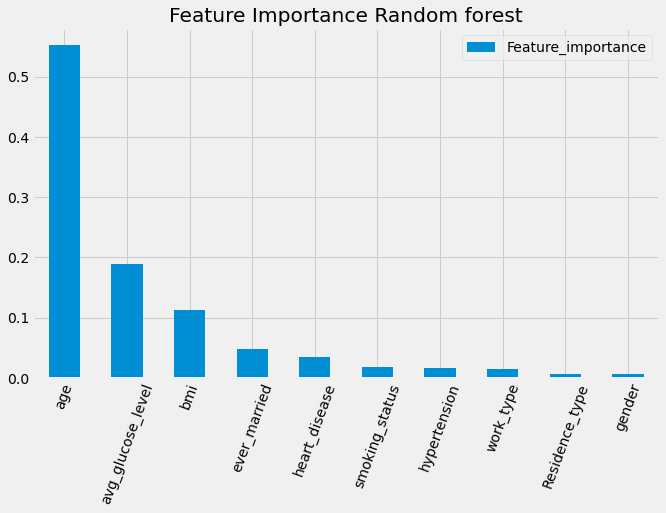

In [158]:
feature_score = pd.DataFrame(RF_model.feature_importances_, index =df.columns,  columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance Random forest');

## MODEL COMPARISON

In [159]:
model_compare = pd.DataFrame({
    
'Models':['Desicion Tree','RandomForestClassifier','LogisticRegression','LinearDiscriminantAnalysis','Naive_Bayes'],
'f1_score':[DT_f1_score, RF_f1_score, LR_f1_score, LDA_f1_score, NB_f1_score],
'recall':[DT_recall, RF_recall, LR_recall, LDA_recall, NB_recall],
'Accuracy on train set':[DT_train_score,RF_train_score,LR_train_score,LDA_train_score,NB_train_score],
'Accuracy on test set':[DT_test_score, RF_test_score,LR_test_score,LDA_test_score,NB_test_score]

})

model_compare = model_compare.sort_values('recall',ascending=False)

In [161]:
# print out comparison in 'Blues' or 'Greens' or 'Greys'
model_compare.style.background_gradient(cmap='Greens')

,Models,f1_score,recall,Accuracy on train set,Accuracy on test set
4,Naive_Bayes,0.267658,0.433735,0.870282,0.871494
3,LinearDiscriminantAnalysis,0.080000,0.048193,0.951076,0.939987
0,Desicion Tree,0.000000,0.000000,0.953592,0.945858
1,RandomForestClassifier,0.000000,0.000000,0.953592,0.945858
2,LogisticRegression,0.000000,0.000000,0.953592,0.945858
